# 🛍️ Smart Product Search: How It Works  

Imagine you walk into a store and say to the shopkeeper:  
👉 *“I need a camera for vlogging.”*  

Now, how does our system act like that smart shopkeeper?  

---

## 1️⃣ Transformers: Understanding Context  
We use **Transformer models** (like SentenceTransformer) to process text.  
Unlike older models that looked at words one by one, transformers understand **context**.  

Example:  
- *“Apple” (fruit)* 🍎 ≠ *“Apple” (company)* 💻  
Transformers know the difference because they look at **surrounding words**.  

---

## 2️⃣ Embeddings: Turning Text into Numbers  
Computers can’t understand words directly.  
So, each sentence or product description is converted into a **vector** (a list of numbers) called an **embedding**.  

👉 Think of embeddings as **coordinates on a map**:  
- “Running sneakers” and “Jogging shoes” end up close together.  
- “Headphones” and “Laptop” are far apart.  

This is how the computer “understands” meaning.  

---

## 3️⃣ Vector Database (ChromaDB)  
Once all products are converted into embeddings, we store them in **ChromaDB**.  

💡 Why not a normal database?  
- Normal DBs search by exact **keywords**.  
- ChromaDB searches by **meaning**.  

So even if the query is *“marathon sneakers”*, ChromaDB can match with **Nike Air Zoom** or **Adidas Ultraboost**.  

---


## What algo runs behind Vetor Database

### Cosine Similarity: The Matchmaker

Now, how does ChromaDB actually decide **which product is closest in meaning**?  

It uses **Cosine Similarity Formula:**

$$
\text{similarity}(A, B) = \frac{A \cdot B}{||A|| \times ||B||}
$$

Where:  
- **A** = the query embedding (your search as numbers)  
- **B** = a stored product embedding  
- **A · B** = dot product (overlap) between A and B  
- **||A||, ||B||** = lengths of the vectors  

👉 In simple words:  
- If two arrows point in the **same direction**, they mean the same thing.  
- If they point in different directions, they are unrelated.  

**Example:**  

Query = *“running shoes”*  
- Product A: *“marathon sneakers”* → similarity = **0.95** ✅  
- Product B: *“wireless headphones”* → similarity = **0.12** ❌  

So Product A will be ranked higher.  

---

## 4️⃣ PCA vs t-SNE: Visualizing Embeddings  

Embeddings live in **hundreds of dimensions** (far more than humans can imagine).  
To make sense of them, we reduce them into 2D or 3D for visualization.  
That’s where **PCA** and **t-SNE** come in.  

---

### 🔷 PCA (Principal Component Analysis)  
- **What it does**: Finds the main “directions” of variation in the data.  
- This is a technique to reduce the size of embeddings (usually hundreds of dimensions) into just 2 or 3 dimensions so humans can visualize them. PCA keeps the “main patterns” in the data while dropping small details.
- It’s like compressing a big photo but still being able to see the main picture.
- Strengths:  
  - Keeps the **global structure** of the data.  
  - Fast and simple.  
- Limitations:  
  - Sometimes spreads apart points that are actually very similar in meaning.  

👉 Example: With PCA, all types of shoes may appear somewhat close,  
but running shoes vs. casual sneakers may not cluster tightly.  

---

### 🔶 t-SNE (t-distributed Stochastic Neighbor Embedding)  
- **What it does**: Focuses on preserving **local neighborhoods**.  
- It ensures that points that were close in high dimensions stay close in 2D.  
- Strengths:  
  - Great at showing **clusters of similar items**.  
  - More human-intuitive: “things that belong together, appear together.”  
- Limitations:  
  - Slower and more computationally heavy.  
  - Sometimes distorts global distances.  

👉 Example: With t-SNE, “running shoes” and “marathon sneakers” will appear very close,  
even if the bigger picture of *all footwear* gets a bit distorted.  

---

### 🧩 How They Work Together  
- **PCA** gives the **big map** — showing how all products are spread out overall.  
- **t-SNE** zooms into **clusters** — showing small groups of very similar items.  

That’s why we often look at **both plots**:  
- PCA → “Where am I in the whole city?” 🗺️  
- t-SNE → “Who are my closest neighbors?” 🏘️  

---

## 5️⃣ The Search Process  

1. User types a query (e.g., *“Best laptop for travel”*).  
2. Transformer converts it into an **embedding**.  
3. ChromaDB compares it with stored product embeddings.  
4. Finds the **closest match**.  
   ✅ *Dell XPS 13 → Lightweight laptop with long battery life.*  

---

## 6️⃣ Why Return Metadata + Description?  
- **Metadata** → Product name (*Dell XPS 13*).  
- **Document** → Product description (*Lightweight laptop with strong performance…*).  

Together, they form a complete human-readable answer.  

---

## 7️⃣ End-to-End Flow  

**User Query → Embedding → ChromaDB → Best Match → Return Metadata + Description**  

---

### 🔑 Summary  
We transformed **text → embeddings → stored in ChromaDB → searched by meaning → returned the best product**.  

And we can even **visualize this “semantic map”** using PCA or t-SNE  
to see how products cluster by meaning.  


In [1]:
!pip install sentence-transformers chromadb matplotlib scikit-learn

import chromadb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

# ------------------------
# 1. Load Local Embedding Model (FREE)
# ------------------------
model = SentenceTransformer("all-MiniLM-L6-v2")

# WHY: Models like "all-MiniLM-L6-v2" turn text into numerical vectors ("embeddings") that capture meaning. It runs locally (no API key/cost).

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
# ------------------------
# 1.Dummy Product Catalog
# ------------------------
products = {
    "Nike Air Zoom": "High-performance running shoes with cushioning and breathable mesh.",
    "Adidas Ultraboost": "Comfortable sneakers designed for long-distance running.",
    "Sony WH-1000XM4": "Noise-cancelling wireless headphones with long battery life.",
    "iPhone 14 Pro": "Smartphone with advanced camera, powerful processor, and sleek design.",
    "Dell XPS 13": "Lightweight laptop with strong performance and long battery backup.",
    "Samsonite Luggage": "Durable, lightweight travel luggage with wheels.",
    "Bose QC45": "Premium noise-cancelling headphones for work and travel.",
    "MacBook Air M2": "Ultra-thin Apple laptop with powerful M2 chip and long battery.",
    "Canon EOS R10": "Mirrorless camera with fast autofocus and 4K video.",
    "Kindle Paperwhite": "E-reader with glare-free display and weeks of battery life.",
    "Fitbit Charge 6": "Fitness tracker with heart rate monitoring and workout tracking.",
    "GoPro Hero 11": "Action camera built for outdoor sports and adventures."
}

titles = list(products.keys())
descriptions = list(products.values())

In [3]:
# ------------------------
# 3. Initialize ChromaDB
# ------------------------
chroma_client = chromadb.Client()
collection = chroma_client.create_collection("products")

# WHY: Chroma stores (document text + metadata + embedding vector) so we can do
# fast "search by meaning". This in-memory client is free and local.
# We embed product descriptions ONCE, then store vectors in Chroma for search.

In [4]:
# ------------------------
# 4. Insert Products (with Hugging Face embeddings)
# ------------------------
embeddings = model.encode(descriptions)      # shape of matrix: (N, 384) __this depends on the model we chose

for i, (name, desc) in enumerate(products.items()):
    collection.add(
        ids=[str(i)],                        # unique ID per product
        documents=[desc],                    # the searchable text
        metadatas=[{"name": name}],          # extra info we want back in results
        embeddings=[embeddings[i].tolist()]  # the vector (list for JSON-ability)
    )


💡 Analogy:
Imagine you’re creating a library card catalog:

- ID → card number

- Document → book summary

- Metadata → book title, author, genre

- Embedding → secret code that tells you where similar books are shelved

In [5]:
# ------------------------
# 5. Search Function (One Best Match)
# ------------------------
def vector_search(query):
    query_embedding = model.encode([query])[0].tolist()  # Embed the query text so it lives in the same vector space as products
    results = collection.query(                          # Query Chroma for nearest neighbors by cosine similarity
        query_embeddings=[query_embedding],
        n_results=1
    )
    name = results["metadatas"][0][0]["name"]            # Extract back human-friendly fields
    desc = results["documents"][0][0]
    return name, desc


In [6]:
# ------------------------
# 6. Example Queries
# ------------------------
queries = [
    "lightweight running shoes",
    "best laptop for travel",
    "headphones for office work",
    "camera for vlogging",
    "device for reading books",
    "fitness wearable for tracking heart rate",
    "adventure camera for extreme sports"
]

for q in queries:
    product, desc = vector_search(q)
    print(f"\n🔎 Query: {q}")
    print(f"✅ Best Match → {product}: {desc}")



🔎 Query: lightweight running shoes
✅ Best Match → Nike Air Zoom: High-performance running shoes with cushioning and breathable mesh.

🔎 Query: best laptop for travel
✅ Best Match → Dell XPS 13: Lightweight laptop with strong performance and long battery backup.

🔎 Query: headphones for office work
✅ Best Match → Bose QC45: Premium noise-cancelling headphones for work and travel.

🔎 Query: camera for vlogging
✅ Best Match → GoPro Hero 11: Action camera built for outdoor sports and adventures.

🔎 Query: device for reading books
✅ Best Match → Kindle Paperwhite: E-reader with glare-free display and weeks of battery life.

🔎 Query: fitness wearable for tracking heart rate
✅ Best Match → Fitbit Charge 6: Fitness tracker with heart rate monitoring and workout tracking.

🔎 Query: adventure camera for extreme sports
✅ Best Match → GoPro Hero 11: Action camera built for outdoor sports and adventures.


# Lets try with one **User Query** and plot the points in a **Vector Space**

🔍 Query: running sneakers for marathon training

Top Matches:
- Adidas Ultraboost (0.81 similarity)
- Nike Air Zoom (0.67 similarity)
- GoPro Hero 11 (0.22 similarity)


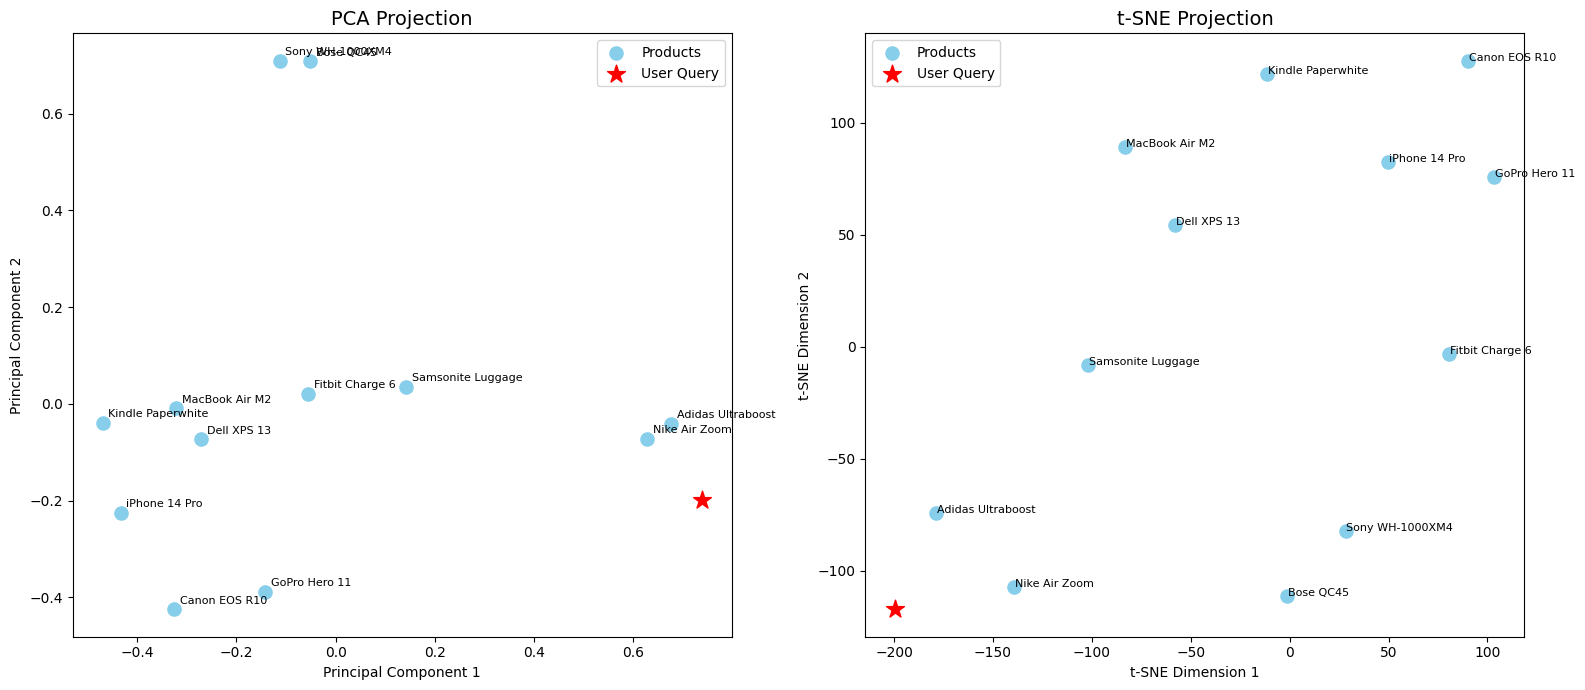

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
# the vector DB (Chroma), and plotting (matplotlib) + projection (PCA/t-SNE).

# 1. Product dataset
products = {
    "Nike Air Zoom": "High-performance running shoes with cushioning and breathable mesh.",
    "Adidas Ultraboost": "Comfortable sneakers designed for long-distance running.",
    "Sony WH-1000XM4": "Noise-cancelling wireless headphones with long battery life.",
    "iPhone 14 Pro": "Smartphone with advanced camera, powerful processor, and sleek design.",
    "Dell XPS 13": "Lightweight laptop with strong performance and long battery backup.",
    "Samsonite Luggage": "Durable, lightweight travel luggage with wheels.",
    "Bose QC45": "Premium noise-cancelling headphones for work and travel.",
    "MacBook Air M2": "Ultra-thin Apple laptop with powerful M2 chip and long battery.",
    "Canon EOS R10": "Mirrorless camera with fast autofocus and 4K video.",
    "Kindle Paperwhite": "E-reader with glare-free display and weeks of battery life.",
    "Fitbit Charge 6": "Fitness tracker with heart rate monitoring and workout tracking.",
    "GoPro Hero 11": "Action camera built for outdoor sports and adventures."
}

# Example user query
user_query = "running sneakers for marathon training"

# 2. Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# 3. Encode products & query
product_names = list(products.keys())
product_descriptions = list(products.values())

product_embeddings = model.encode(product_descriptions, convert_to_tensor=True)
query_embedding = model.encode(user_query, convert_to_tensor=True)

# 4. Find most similar products
cos_sim = cosine_similarity(query_embedding.cpu().numpy().reshape(1, -1),
                            product_embeddings.cpu().numpy())
top_idx = np.argsort(-cos_sim[0])[:3]  # top 3 in descending fashion

print("🔍 Query:", user_query)
print("\nTop Matches:")
for i in top_idx:
    print(f"- {product_names[i]} ({cos_sim[0][i]:.2f} similarity)")

# 5. Visualization with PCA and t-SNE
product_embeddings_np = product_embeddings.cpu().numpy()
query_embedding_np = query_embedding.cpu().numpy().reshape(1, -1)

all_embeddings = np.vstack([product_embeddings_np, query_embedding_np])

# --- PCA ---
pca = PCA(n_components=2)
pca_results = pca.fit_transform(all_embeddings)

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42, init="random", learning_rate=200)
tsne_results = tsne.fit_transform(all_embeddings)

# Separate points
product_points_pca, query_point_pca = pca_results[:-1], pca_results[-1]
product_points_tsne, query_point_tsne = tsne_results[:-1], tsne_results[-1]

# --- Plot both side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- PCA Plot ---
axes[0].scatter(product_points_pca[:, 0], product_points_pca[:, 1], c="skyblue", s=90, label="Products")
axes[0].scatter(query_point_pca[0], query_point_pca[1], c="red", s=180, marker="*", label="User Query")

# Dynamic offset based on data range.   # dynamic annotation offset (1% of axis range) so labels don't float away
x_range = product_points_pca[:, 0].max() - product_points_pca[:, 0].min()
y_range = product_points_pca[:, 1].max() - product_points_pca[:, 1].min()

for i, name in enumerate(product_names):
    axes[0].text(product_points_pca[i, 0] + 0.01 * x_range,
                 product_points_pca[i, 1] + 0.01 * y_range,
                 name, fontsize=8)

axes[0].set_title("PCA Projection", fontsize=14)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend()

# t-SNE Plot
axes[1].scatter(product_points_tsne[:, 0], product_points_tsne[:, 1], c="skyblue", s=90, label="Products")
axes[1].scatter(query_point_tsne[0], query_point_tsne[1], c="red", s=180, marker="*", label="User Query")
for i, name in enumerate(product_names):
    axes[1].text(product_points_tsne[i, 0] + 0.5, product_points_tsne[i, 1], name, fontsize=8)
axes[1].set_title("t-SNE Projection", fontsize=14)
axes[1].set_xlabel("t-SNE Dimension 1")
axes[1].set_ylabel("t-SNE Dimension 2")
axes[1].legend()

plt.tight_layout()
plt.show()